# IMPORTING ALL THE ESSENTIAL LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# READING THE CSV FILE

In [2]:
df = pd.read_csv(r"C:\python_project\NYPD_Arrest_Data_2023.csv")

# Check the first few rows of the dataset

In [3]:
print(df.head())

   ARREST_KEY ARREST_DATE  PD_CD                      PD_DESC  KY_CD  \
0   261209118  01-01-2023    109     ASSAULT 2,1,UNCLASSIFIED  106.0   
1   262984267  02-03-2023    515  CONTROLLED SUBSTANCE,SALE 3  117.0   
2   263664549  02/15/2023    105            STRANGULATION 1ST  106.0   
3   261345231  01-04-2023    105            STRANGULATION 1ST  106.0   
4   263536618  02/13/2023    109     ASSAULT 2,1,UNCLASSIFIED  106.0   

         OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  ARREST_PRECINCT  \
0   FELONY ASSAULT  PL 1200501          F           K               77   
1  DANGEROUS DRUGS  PL 2203901          F           K               73   
2   FELONY ASSAULT  PL 1211200          F           K               62   
3   FELONY ASSAULT  PL 1211200          F           M               32   
4   FELONY ASSAULT  PL 12005WX          F           K               71   

   JURISDICTION_CODE AGE_GROUP PERP_SEX PERP_RACE  X_COORD_CD  Y_COORD_CD  \
0                  0     45-64        F     B

# Check for missing values

In [4]:
print(df.isnull().sum())

ARREST_KEY              0
ARREST_DATE             0
PD_CD                   0
PD_DESC                 0
KY_CD                  13
OFNS_DESC               0
LAW_CODE                0
LAW_CAT_CD           1257
ARREST_BORO             0
ARREST_PRECINCT         0
JURISDICTION_CODE       0
AGE_GROUP               0
PERP_SEX                0
PERP_RACE               0
X_COORD_CD              0
Y_COORD_CD              0
Latitude                0
Longitude               0
dtype: int64


# Drop rows with missing values in crucial columns, if necessary

In [5]:
df = df.dropna(subset=['ARREST_DATE', 'ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE'])

# Convert ARREST_DATE to datetime

In [6]:
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'], errors='coerce')

# Check for duplicate rows

In [7]:
print(f"Duplicate Rows: {df.duplicated().sum()}")

Duplicate Rows: 0


# Remove duplicates if any


In [8]:
df = df.drop_duplicates()

# Descriptive statistics of numerical columns




In [9]:
print(df.describe())

         ARREST_KEY                    ARREST_DATE          PD_CD  \
count  1.700950e+05                          68795  170095.000000   
mean   2.683705e+08  2023-05-07 01:16:22.798168576     425.242200   
min    2.611809e+08            2023-01-01 00:00:00       2.000000   
25%    2.649555e+08            2023-03-03 00:00:00     114.000000   
50%    2.685036e+08            2023-05-06 00:00:00     397.000000   
75%    2.718261e+08            2023-07-09 00:00:00     705.000000   
max    2.752350e+08            2023-09-12 00:00:00     997.000000   
std    4.027782e+06                            NaN     275.312255   

               KY_CD  ARREST_PRECINCT  JURISDICTION_CODE    X_COORD_CD  \
count  170082.000000    170095.000000      170095.000000  1.700950e+05   
mean      249.766342        63.423569           0.945918  1.005863e+06   
min       101.000000         1.000000           0.000000  0.000000e+00   
25%       113.000000        40.000000           0.000000  9.913600e+05   
50%     

# 1. Distribution of arrests over time (ARREST_DATE)

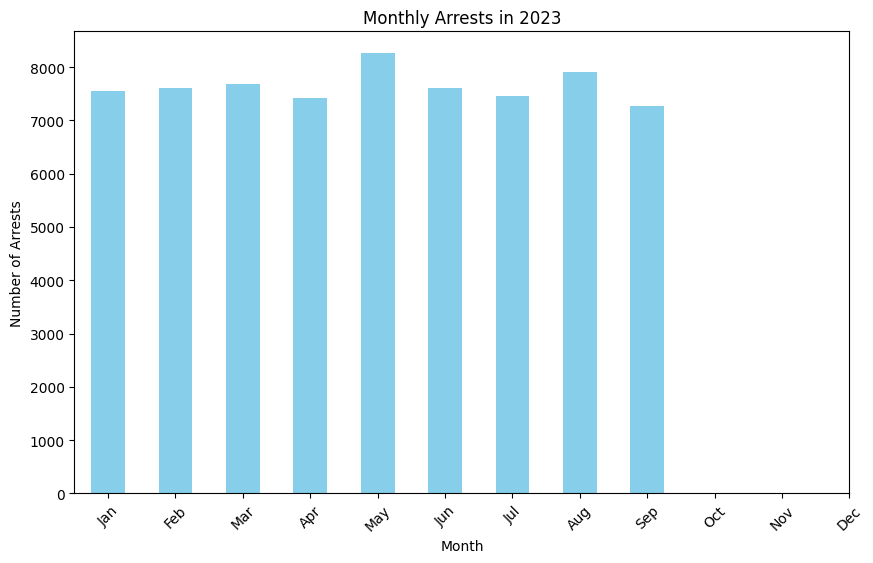

In [10]:
plt.figure(figsize=(10, 6))
df['ARREST_DATE'].dt.month.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Monthly Arrests in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Arrests')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

# 2. Arrests by Borough (ARREST_BORO)

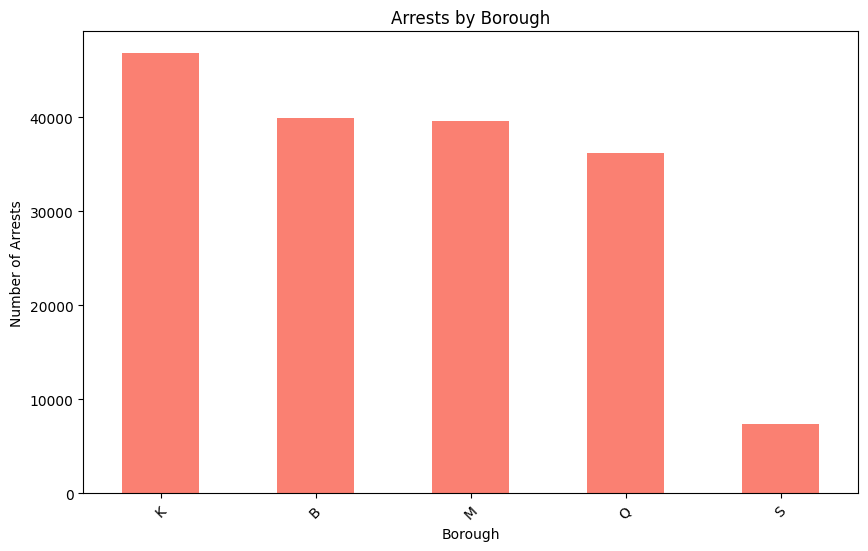

In [11]:
plt.figure(figsize=(10, 6))
df['ARREST_BORO'].value_counts().plot(kind='bar', color='salmon')
plt.title('Arrests by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.show()

# 3. Arrests by Age Group (AGE_GROUP)

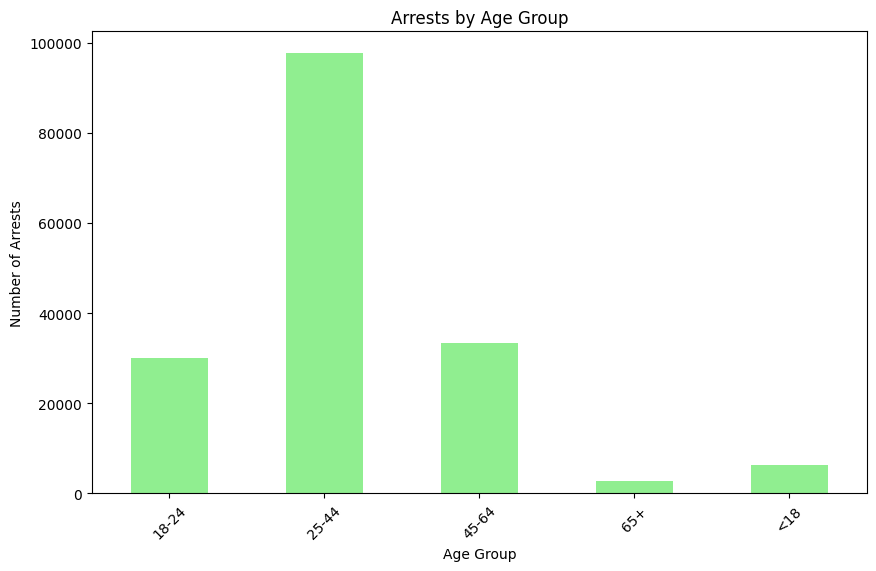

In [12]:
plt.figure(figsize=(10, 6))
df['AGE_GROUP'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Arrests by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.show()

# 4. Arrests by Perpetrator Sex (PERP_SEX)

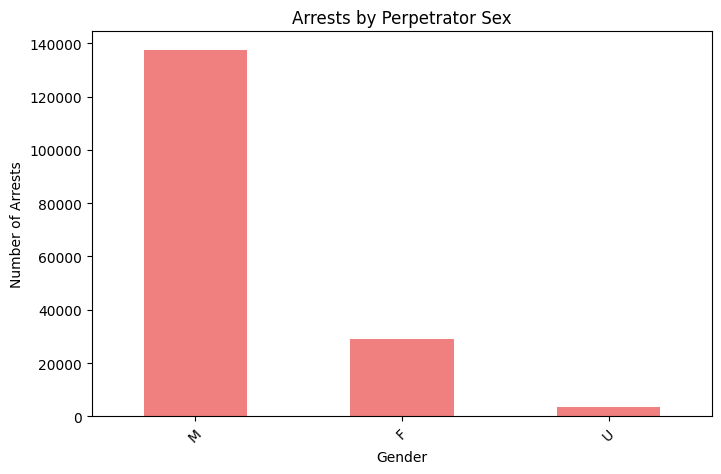

In [13]:
plt.figure(figsize=(8, 5))
df['PERP_SEX'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Arrests by Perpetrator Sex')
plt.xlabel('Gender')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.show()

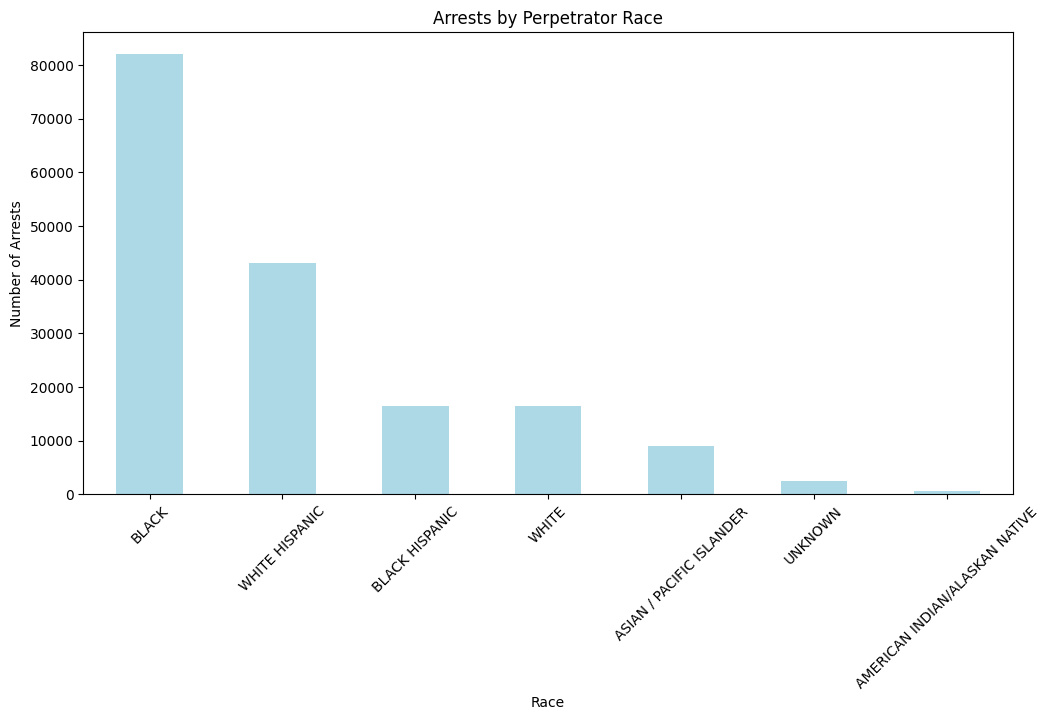

In [13]:
# 5. Arrests by Perpetrator Race (PERP_RACE)
plt.figure(figsize=(12, 6))
df['PERP_RACE'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Arrests by Perpetrator Race')
plt.xlabel('Race')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.show()


# 6. Arrests by Crime Type (OFNS_DESC and PD_DESC)

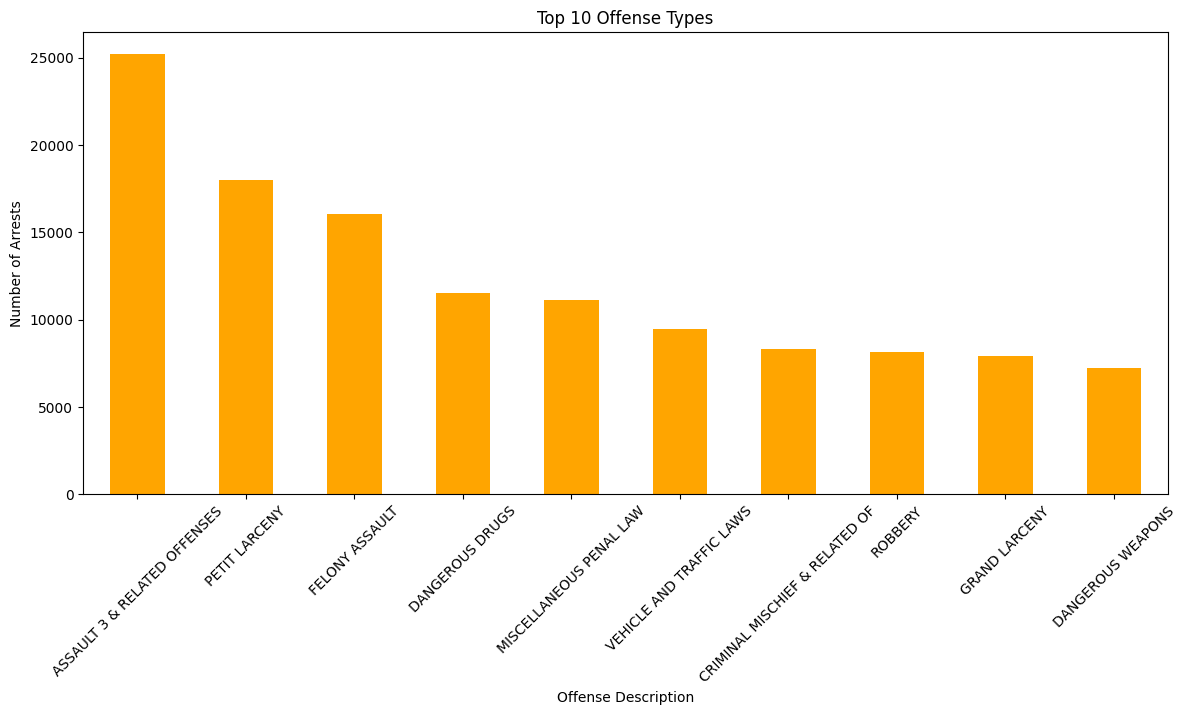

In [14]:
# OFNS_DESC: Offense Description
# PD_DESC: PD (Police Department) Code Description
plt.figure(figsize=(14, 6))
df['OFNS_DESC'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Offense Types')
plt.xlabel('Offense Description')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.show()

# 7. Arrests by Crime Law Category (LAW_CAT_CD)

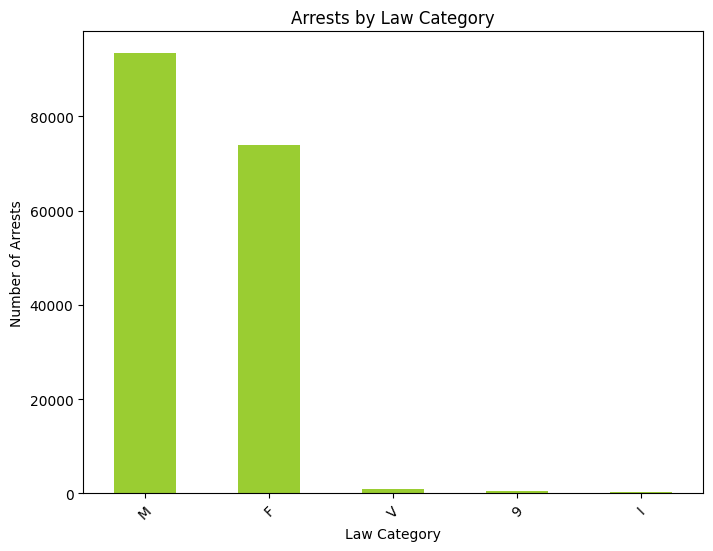

In [15]:
plt.figure(figsize=(8, 6))
df['LAW_CAT_CD'].value_counts().plot(kind='bar', color='yellowgreen')
plt.title('Arrests by Law Category')
plt.xlabel('Law Category')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.show()

# 8. Plot arrests on a scatter plot based on Latitude and Longitude

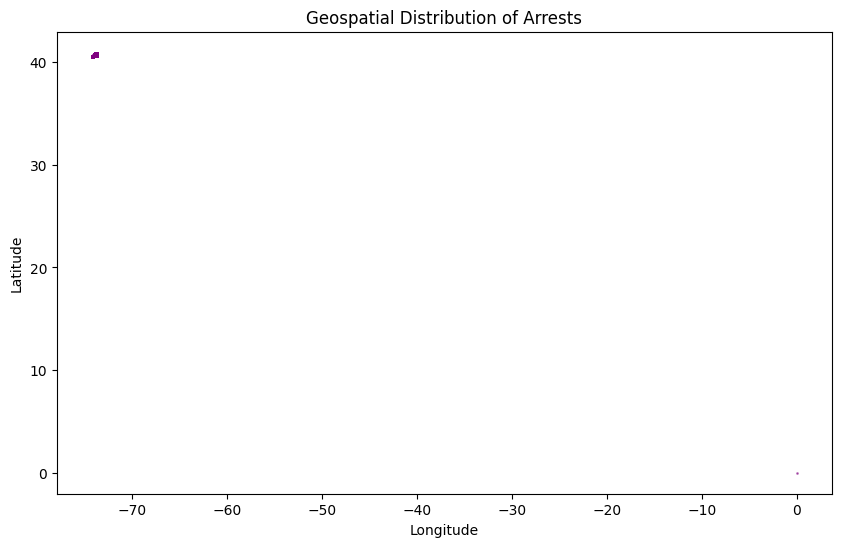

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, color='purple', s=1)
plt.title('Geospatial Distribution of Arrests')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# 9. Plot arrests by day of the week

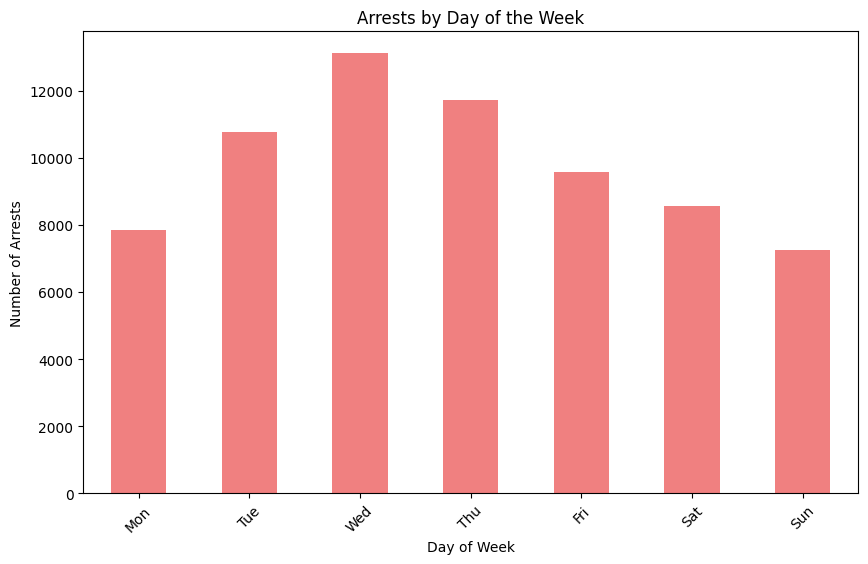

In [17]:
df['hour'] = df['ARREST_DATE'].dt.hour
df['day_of_week'] = df['ARREST_DATE'].dt.dayofweek
df['month'] = df['ARREST_DATE'].dt.month

# Extract day of the week from ARREST_DATE
df['day_of_week'] = df['ARREST_DATE'].dt.dayofweek

plt.figure(figsize=(10, 6))
df.groupby('day_of_week').size().plot(kind='bar', color='lightcoral')
plt.title('Arrests by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Arrests')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()

# 10. Plot correlation between age group and arrest count for different offenses

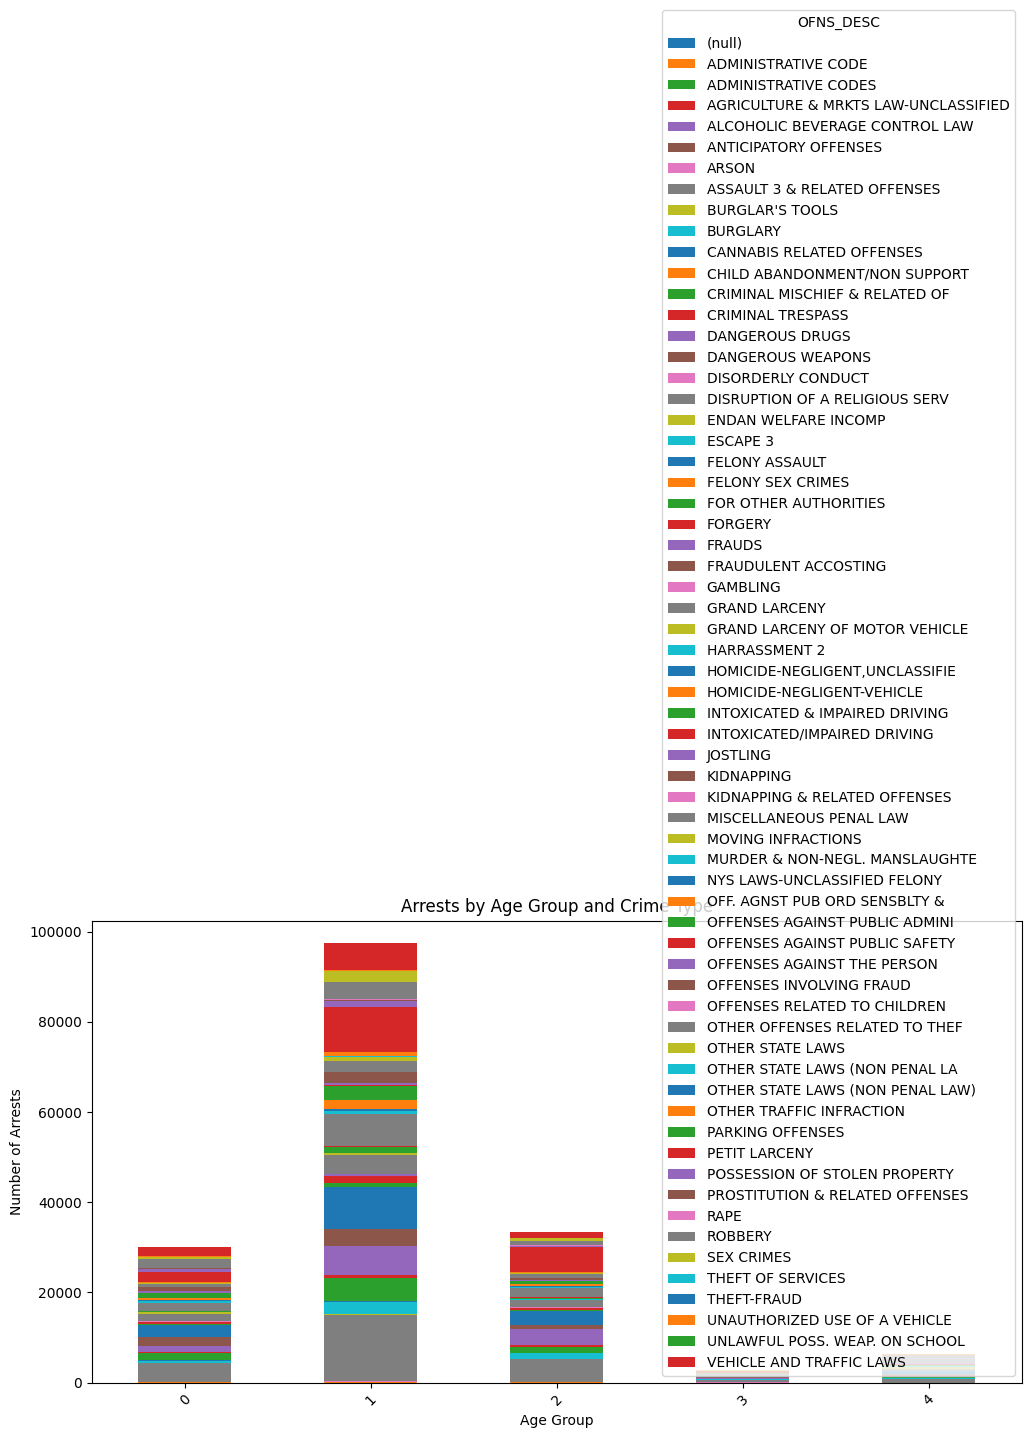

In [18]:
df['AGE_GROUP'] = df['AGE_GROUP'].astype('category').cat.codes  # Convert age groups to numerical values
df.groupby('AGE_GROUP')['OFNS_DESC'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Arrests by Age Group and Crime Type')
plt.xlabel('Age Group')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.show()